Author - Mihir Ahuja

Data Citations - https://www.kaggle.com/c/nlp-getting-started/overview

Note - *Using only Meta Features can we classify tweets as Fake or Real?*

In [15]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import collections
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
train = pd.read_csv('/content/drive/My Drive/TweetPrediction/train_v3.csv')
test = pd.read_csv('/content/drive/My Drive/TweetPrediction/test_v3.csv')
train['text'] = train['text'].astype(str)
test['text'] = test['text'].astype(str)

In [5]:
train

,Unnamed: 0,Unnamed: 0.1,id,keyword,location,text,target,Number_of_words,Number_of_Sentences,Number_of_Unique_Words,Number_of_Stop_Words,Number_of_Hashtage,Number_of_Mentions,Average_Word_Length
0,0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,14,1,13,5,1,0,4.384615
1,1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,8,2,7,0,0,0,4.571429
2,2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,24,2,20,9,0,0,5.090909
3,3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,1,8,1,1,0,7.125000
4,4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,18,1,15,6,2,0,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,13,1,11,3,0,0,6.636364
7609,7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,24,2,17,7,0,2,5.300000
7610,7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,15,2,8,2,0,0,7.250000
7611,7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,21,2,19,5,0,0,6.263158


The idea is to only use meta features like Word count, sentence count, hashtags, etc and understand the signal that can be extracted purely from meta features

In [6]:
feature_cols = ['Number_of_words',	'Number_of_Sentences',	'Number_of_Unique_Words',	'Number_of_Stop_Words',	'Number_of_Hashtage',	'Number_of_Mentions',	'Average_Word_Length']

In [7]:
X = train[feature_cols] # Features
y = train.target

In [11]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [14]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[344, 103],
       [159, 156]])

Text(0.5, 257.44, 'Predicted label')

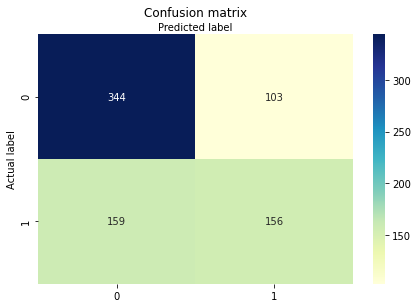

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6561679790026247
Precision: 0.6023166023166023
Recall: 0.49523809523809526


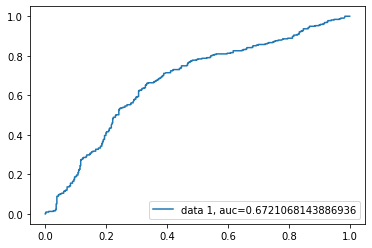

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Using Threshold of 0.3

In [22]:
def threshold_prob(predictions,threshold):
  arr = []
  for p in predictions:
    if p>threshold:
      arr.append(1)
    else:
      arr.append(0)
  return arr


predicted_class = threshold_prob(logreg.predict_proba(X_test)[::,1],0.3)

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted_class)
cnf_matrix


array([[117, 330],
       [ 42, 273]])

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6561679790026247
Precision: 0.6023166023166023
Recall: 0.49523809523809526
